In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import joblib

#### Indicators  
###### highBP = 0 No high blood pressure - 1 high blood pressure
###### cholCheck = 0 for Not checked cholesterol in past 5 years
###### bmi = these are BMI * 100. So for example a BMI of 4018 is really 40.18
###### diabetes = 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
###### general health = 1 is Excellent -> 5 is Poor
###### mental health = scale will be 0-30
###### physical health = scale will be 0-30
###### sex = male 1 - female 0
###### age = 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments
###### education = 1 being never attended school or kindergarten only up to 6 being college 4 years or more
###### income = 1 being less than 10,000 all the way up to 8 being 75,000 or more


In [2]:
df = pd.read_csv(r"C:\Users\haiss\Downloads\archive\heart_disease_health_indicators_BRFSS2015.csv")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['heartdiseaseorattack', 'highbp', 'highchol', 'cholcheck', 'bmi',
       'smoker', 'stroke', 'diabetes', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education',
       'income'],
      dtype='object')

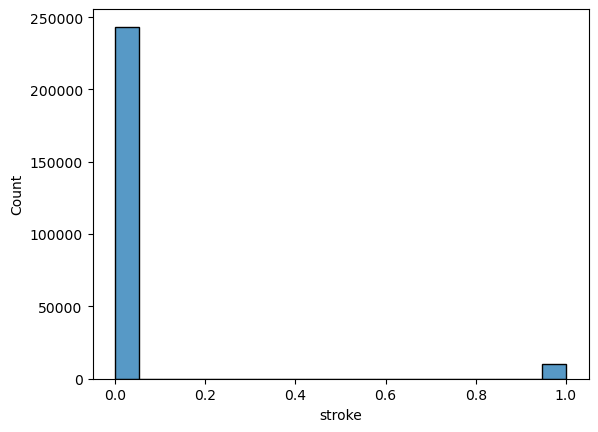

In [4]:
sns.histplot(df['stroke'])
plt.show()

In [5]:
dropped = df.loc[:, ['stroke','highbp','highchol','cholcheck','bmi','smoker','physactivity','fruits','veggies','hvyalcoholconsump','anyhealthcare','nodocbccost','genhlth'
,'menthlth','physhlth','diffwalk','sex','age','education','income']]
print(dropped)

        stroke  highbp  highchol  cholcheck   bmi  smoker  physactivity  \
0          0.0     1.0       1.0        1.0  40.0     1.0           0.0   
1          0.0     0.0       0.0        0.0  25.0     1.0           1.0   
2          0.0     1.0       1.0        1.0  28.0     0.0           0.0   
3          0.0     1.0       0.0        1.0  27.0     0.0           1.0   
4          0.0     1.0       1.0        1.0  24.0     0.0           1.0   
...        ...     ...       ...        ...   ...     ...           ...   
253675     0.0     1.0       1.0        1.0  45.0     0.0           0.0   
253676     0.0     1.0       1.0        1.0  18.0     0.0           0.0   
253677     0.0     0.0       0.0        1.0  28.0     0.0           1.0   
253678     0.0     1.0       0.0        1.0  23.0     0.0           0.0   
253679     0.0     1.0       1.0        1.0  25.0     0.0           1.0   

        fruits  veggies  hvyalcoholconsump  anyhealthcare  nodocbccost  \
0          0.0      1.0  

In [6]:
X = dropped.drop('stroke', axis = 1)
y = dropped['stroke']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train

,highbp,highchol,cholcheck,bmi,smoker,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
31141,0.0,1.0,1.0,20.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
98230,0.0,0.0,1.0,34.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,5.0,8.0
89662,1.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,5.0,0.0,1.0,12.0,5.0,6.0
208255,0.0,1.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,6.0,7.0
233415,0.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,12.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.0,0.0,1.0,45.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0,5.0,4.0,1.0
103694,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,7.0
131932,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,9.0,6.0,8.0
146867,0.0,0.0,0.0,23.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,6.0


### Logistic Regression 

In [7]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [8]:
LR.score(X_test, y_test)

0.9593976663513087

In [9]:
LR.score(X_train, y_train)

0.9593237543361716

In [10]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [11]:
pred =LR.predict(X_test)
pred

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

print(classification_report(y_test, pred))
# SUPER imbalanced data

precision:  0.3333333333333333
recall:  0.0014584346135148275
f1:  0.002904162633107454
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     48679
         1.0       0.33      0.00      0.00      2057

    accuracy                           0.96     50736
   macro avg       0.65      0.50      0.49     50736
weighted avg       0.93      0.96      0.94     50736



##### I got an accuracy of 0.96, but the target is super imbalanced since the recall is 0.00. So, I gonna try to oversampled and see what with that value

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[48673,     6],
       [ 2054,     3]], dtype=int64)

In [13]:
# to predict the probabilities instead of a class
predicted_probabilities = LR.predict_proba(X_test)[:,1]
predicted_probabilities
# Then you need to define it by hand
custom_threshold = 0.7  # For example, use a threshold of 0.7
custom_predictions = (predicted_probabilities >= custom_threshold).astype(int)
custom_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
train = pd.concat([X_train, y_train],axis = 1)
train

,highbp,highchol,cholcheck,bmi,smoker,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,stroke
31141,0.0,1.0,1.0,20.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0,0.0
98230,0.0,0.0,1.0,34.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,5.0,8.0,0.0
89662,1.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,5.0,0.0,1.0,12.0,5.0,6.0,0.0
208255,0.0,1.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,6.0,7.0,0.0
233415,0.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,12.0,4.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.0,0.0,1.0,45.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0,5.0,4.0,1.0,0.0
103694,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,7.0,0.0
131932,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,9.0,6.0,8.0,0.0
146867,0.0,0.0,0.0,23.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,6.0,0.0


##### Let´s try an oversampling to increase recall

In [15]:
# Separate the classes
no_stroke = train[train['stroke'] == 0] #194.709 no Stroke 
no_stroke

,highbp,highchol,cholcheck,bmi,smoker,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,stroke
31141,0.0,1.0,1.0,20.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0,0.0
98230,0.0,0.0,1.0,34.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,5.0,8.0,0.0
89662,1.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,5.0,0.0,1.0,12.0,5.0,6.0,0.0
208255,0.0,1.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,6.0,7.0,0.0
233415,0.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,12.0,4.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.0,0.0,1.0,45.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0,5.0,4.0,1.0,0.0
103694,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,7.0,0.0
131932,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,9.0,6.0,8.0,0.0
146867,0.0,0.0,0.0,23.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,6.0,0.0


In [16]:
yes_stroke = train[train['stroke'] == 1] #8235  had Stroke 
yes_stroke

,highbp,highchol,cholcheck,bmi,smoker,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,stroke
73782,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0,15.0,1.0,0.0,13.0,4.0,4.0,1.0
99395,1.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,30.0,0.0,1.0,0.0,7.0,4.0,4.0,1.0
210480,1.0,1.0,1.0,31.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0.0,15.0,1.0,1.0,12.0,4.0,8.0,1.0
71429,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,4.0,15.0,1.0,1.0,10.0,4.0,5.0,1.0
191763,0.0,1.0,1.0,23.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,30.0,30.0,0.0,0.0,10.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173629,1.0,0.0,1.0,20.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,4.0,3.0,1.0
139182,0.0,0.0,1.0,36.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,4.0,7.0,1.0
192300,1.0,1.0,1.0,52.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,25.0,15.0,1.0,0.0,8.0,3.0,1.0,1.0
205041,1.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,1.0,10.0,2.0,3.0,1.0


In [17]:
from sklearn.utils import resample
yes_stroke_upsample = resample(yes_stroke, 
                                 replace = True,
                                 n_samples = len(no_stroke),
                                 random_state = 0)

yes_stroke_upsample   # create some 'fake' data to YES STROKE 194709 

,highbp,highchol,cholcheck,bmi,smoker,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,stroke
208006,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,10.0,4.0,1.0,1.0
47747,1.0,1.0,1.0,29.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,4.0,7.0,1.0
11646,1.0,1.0,1.0,37.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,5.0,0.0,1.0,11.0,4.0,7.0,1.0
37052,1.0,0.0,1.0,32.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,4.0,7.0,1.0
228918,0.0,1.0,1.0,27.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,30.0,25.0,1.0,0.0,8.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49055,1.0,1.0,1.0,38.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,3.0,14.0,1.0,0.0,13.0,5.0,5.0,1.0
84001,1.0,1.0,1.0,27.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,10.0,0.0,1.0,11.0,4.0,8.0,1.0
117651,1.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,30.0,1.0,0.0,11.0,4.0,4.0,1.0
76717,0.0,0.0,1.0,37.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,7.0,0.0,1.0,0.0,4.0,6.0,2.0,1.0


In [18]:
train_oversample = pd.concat([yes_stroke_upsample, no_stroke], axis = 0)
train_oversample

,highbp,highchol,cholcheck,bmi,smoker,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,stroke
208006,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,10.0,4.0,1.0,1.0
47747,1.0,1.0,1.0,29.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,4.0,7.0,1.0
11646,1.0,1.0,1.0,37.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,5.0,0.0,1.0,11.0,4.0,7.0,1.0
37052,1.0,0.0,1.0,32.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,4.0,7.0,1.0
228918,0.0,1.0,1.0,27.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,30.0,25.0,1.0,0.0,8.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.0,0.0,1.0,45.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0,5.0,4.0,1.0,0.0
103694,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,7.0,0.0
131932,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,9.0,6.0,8.0,0.0
146867,0.0,0.0,0.0,23.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,6.0,0.0


In [20]:
y_train_over =train_oversample['stroke']
X_train_over = train_oversample.drop('stroke', axis = 1)
 
LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test)

joblib.dump(LR, 'logistic_model_stroke.pkl')


import pickle

# Save model to a pickle file
with open('logistic_model_stroke.pkl', 'wb') as file:
    pickle.dump(LR, file)